In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
data = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\ICP last year\ai\complaints.csv")
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,09/01/25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,IL,61701,NaN,Consent not provided,Web,09/01/25,Closed with explanation,Yes,NaN,15645629
1,09/02/25,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,NaN,NaN,"EQUIFAX, INC.",IN,46217,NaN,Consent not provided,Web,09/02/25,Closed with non-monetary relief,Yes,NaN,15669371
2,09/01/25,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,NaN,NaN,"EQUIFAX, INC.",TX,77379,NaN,Consent not provided,Web,09/01/25,Closed with explanation,Yes,NaN,15646306
3,09/02/25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",PA,17870,NaN,Consent not provided,Web,09/02/25,Closed with non-monetary relief,Yes,NaN,15637272
4,09/01/25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33572,NaN,Consent not provided,Web,09/01/25,Closed with non-monetary relief,Yes,NaN,15654066


In [4]:
data.info()
data.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35058 entries, 0 to 35057
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 35058 non-null  object 
 1   Product                       35058 non-null  object 
 2   Sub-product                   35058 non-null  object 
 3   Issue                         35058 non-null  object 
 4   Sub-issue                     34748 non-null  object 
 5   Consumer complaint narrative  5588 non-null   object 
 6   Company public response       20560 non-null  object 
 7   Company                       35058 non-null  object 
 8   State                         35037 non-null  object 
 9   ZIP code                      35058 non-null  object 
 10  Tags                          609 non-null    object 
 11  Consumer consent provided?    31634 non-null  object 
 12  Submitted via                 35058 non-null  object 
 13  D

(35058, 18)

In [5]:
print(data.isnull().sum())


Date received                       0
Product                             0
Sub-product                         0
Issue                               0
Sub-issue                         310
Consumer complaint narrative    29470
Company public response         14498
Company                             0
State                              21
ZIP code                            0
Tags                            34449
Consumer consent provided?       3424
Submitted via                       0
Date sent to company                0
Company response to consumer        0
Timely response?                    0
Consumer disputed?              35058
Complaint ID                        0
dtype: int64


In [6]:
# Step 5: Data Cleaning

# Drop columns with excessive missing values or not required for analysis
data = data.drop(columns=[
    'Consumer complaint narrative', 
    'Company public response',         
    'Tags',                            
    'Consumer consent provided?',      
    'Consumer disputed?',              
    'Complaint ID'                     
])

# Drop remaining rows with missing values
data = data.dropna()

# Check dataset shape after cleaning
print("Dataset shape after cleaning:", data.shape)


Dataset shape after cleaning: (34733, 12)


In [7]:
# Verify no missing values remain
print(data.isnull().sum())


Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Company                         0
State                           0
ZIP code                        0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
dtype: int64


In [8]:
# Display number of unique values in each column
print("Number of Unique Values in Each Column:\n")
print(data.nunique())


Number of Unique Values in Each Column:

Date received                      2
Product                            9
Sub-product                       38
Issue                             42
Sub-issue                        159
Company                          475
State                             56
ZIP code                        5187
Submitted via                      4
Date sent to company              31
Company response to consumer       5
Timely response?                   2
dtype: int64


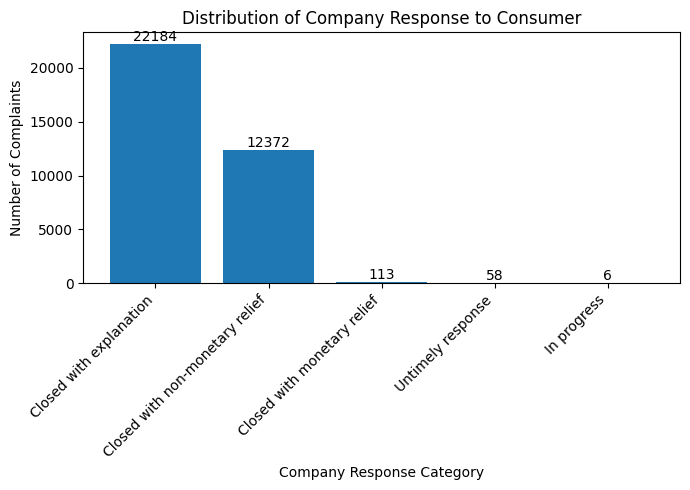

In [9]:
# Count each response category
response_count = data['Company response to consumer'].value_counts()

# Plot bar chart
plt.figure(figsize=(7,5))
bars = plt.bar(response_count.index, response_count.values)

plt.title('Distribution of Company Response to Consumer')
plt.xlabel('Company Response Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        bar.get_height(),
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


In [10]:
# Step 9: Feature Selection
# Select relevant features based on proposal and EDA
selected_features = [
    'Submitted via',
    'State',
    'Product',
    'Sub-product',
    'Issue',
    'Timely response?'
]

# Define input features (X) and target variable (y)
X = data[selected_features].copy()
y = data['Company response to consumer']

# Display shape of selected data
print("Feature matrix shape:", X.shape)
print("Target variable shape:", y.shape)

# Display first few rows
X.head()


Feature matrix shape: (34733, 6)
Target variable shape: (34733,)


,Submitted via,State,Product,Sub-product,Issue,Timely response?
0,Web,IL,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Yes
1,Web,IN,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Yes
2,Web,TX,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Yes
3,Web,PA,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Yes
4,Web,FL,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Yes


In [11]:
# Step 10: Feature Encoding
# Encode 'Timely response?' (binary categorical feature)
label_encoder = LabelEncoder()
X['Timely response?'] = label_encoder.fit_transform(X['Timely response?'])

# One-hot encode remaining categorical features
X_encoded = pd.get_dummies(
    X,
    columns=['Submitted via', 'State', 'Product', 'Sub-product', 'Issue'],
    drop_first=True
)

# Display shape after encoding
print("Shape after encoding:", X_encoded.shape)

# Preview encoded data
X_encoded.head()


Shape after encoding: (34733, 145)


,Timely response?,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,State_AK,State_AL,State_AP,State_AR,State_AS,State_AZ,...,Issue_Struggling to pay your bill,Issue_Struggling to pay your loan,Issue_Struggling to repay your loan,Issue_Threatened to contact someone or share information improperly,Issue_Took or threatened to take negative or legal action,Issue_Trouble during payment process,Issue_Trouble using the card,Issue_Trouble using your card,Issue_Unable to get your credit report or credit score,Issue_Written notification about debt
0,1,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# Encode target variable
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

# Display mapping
print("Target variable mapping:")
for i, label in enumerate(target_encoder.classes_):
    print(f"{label} -> {i}")


Target variable mapping:
Closed with explanation -> 0
Closed with monetary relief -> 1
Closed with non-monetary relief -> 2
In progress -> 3
Untimely response -> 4


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y_encoded,
    test_size=0.2,
    random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (27786, 145)
Testing data shape: (6947, 145)


In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
log_reg = LogisticRegression(
    max_iter=2000,
    solver='lbfgs',
    class_weight='balanced'
)

log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_conf_matrix = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, y_pred_lr, zero_division=0))


Logistic Regression Accuracy: 0.42378004894198934
              precision    recall  f1-score   support

           0       0.65      0.27      0.38      4389
           1       0.08      0.52      0.14        25
           2       0.38      0.69      0.49      2521
           3       0.00      1.00      0.01         1
           4       0.67      0.91      0.77        11

    accuracy                           0.42      6947
   macro avg       0.36      0.68      0.36      6947
weighted avg       0.55      0.42      0.42      6947



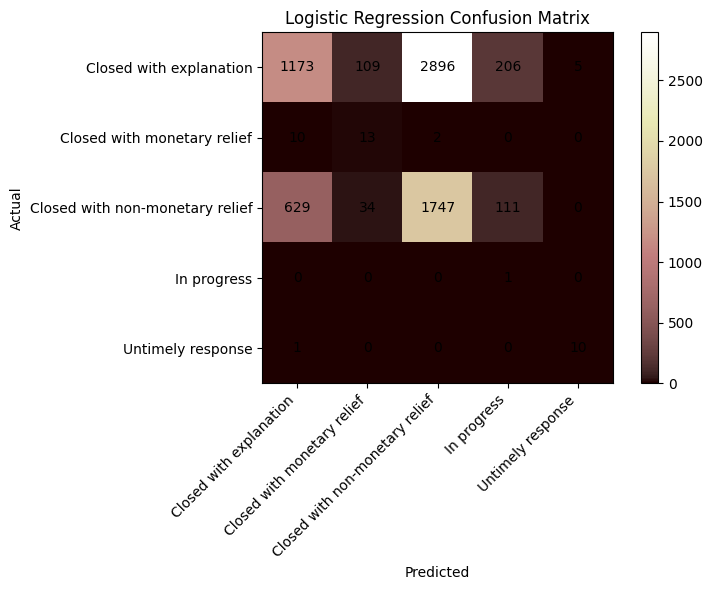

In [16]:

class_labels = target_encoder.classes_

plt.figure(figsize=(8,6))
plt.imshow(lr_conf_matrix, cmap='pink')
plt.colorbar()
plt.xticks(range(len(class_labels)), class_labels, rotation=45, ha='right')
plt.yticks(range(len(class_labels)), class_labels)

for i in range(lr_conf_matrix.shape[0]):
    for j in range(lr_conf_matrix.shape[1]):
        plt.text(j, i, lr_conf_matrix[i, j], ha='center', va='center')

plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [17]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, y_pred_dt, zero_division=0))

Decision Tree Accuracy: 0.6289045631207716
              precision    recall  f1-score   support

           0       0.63      0.99      0.77      4389
           1       0.20      0.04      0.07        25
           2       0.37      0.01      0.03      2521
           3       0.00      0.00      0.00         1
           4       0.80      0.73      0.76        11

    accuracy                           0.63      6947
   macro avg       0.40      0.35      0.32      6947
weighted avg       0.53      0.63      0.50      6947



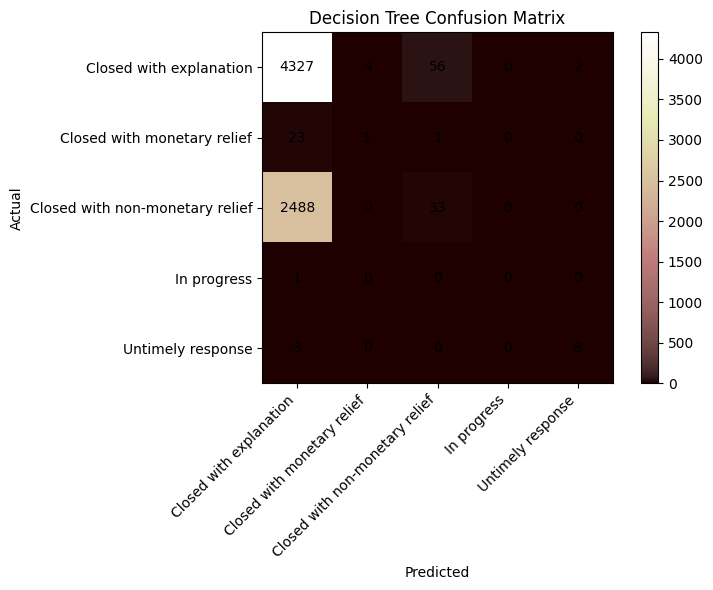

In [18]:
plt.figure(figsize=(8,6))
plt.imshow(dt_conf_matrix, cmap='pink')
plt.colorbar()
plt.xticks(range(len(class_labels)), class_labels, rotation=45, ha='right')
plt.yticks(range(len(class_labels)), class_labels)

for i in range(dt_conf_matrix.shape[0]):
    for j in range(dt_conf_matrix.shape[1]):
        plt.text(j, i, dt_conf_matrix[i, j], ha='center', va='center')

plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [19]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, y_pred_rf, zero_division=0))

Random Forest Accuracy: 0.45875917662300275
              precision    recall  f1-score   support

           0       0.64      0.36      0.46      4389
           1       0.10      0.16      0.12        25
           2       0.37      0.63      0.47      2521
           3       0.00      0.00      0.00         1
           4       0.82      0.82      0.82        11

    accuracy                           0.46      6947
   macro avg       0.39      0.39      0.37      6947
weighted avg       0.54      0.46      0.46      6947



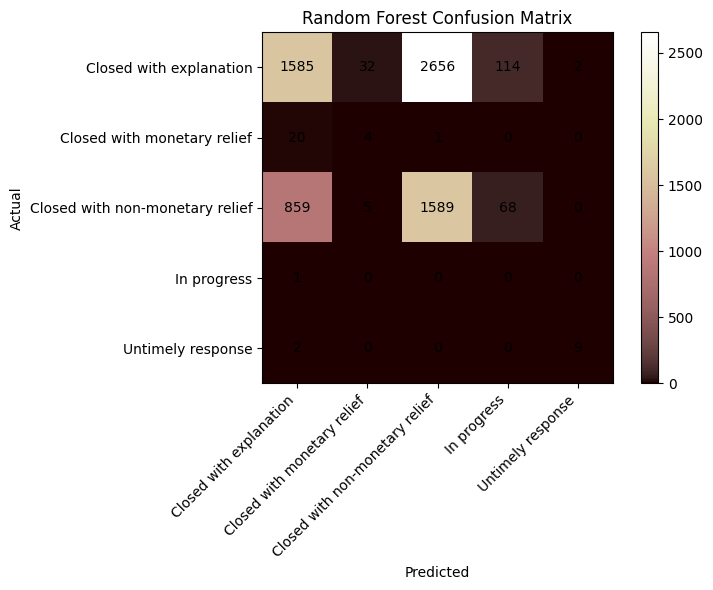

In [20]:
plt.figure(figsize=(8,6))
plt.imshow(rf_conf_matrix, cmap='pink')
plt.colorbar()
plt.xticks(range(len(class_labels)), class_labels, rotation=45, ha='right')
plt.yticks(range(len(class_labels)), class_labels)

for i in range(rf_conf_matrix.shape[0]):
    for j in range(rf_conf_matrix.shape[1]):
        plt.text(j, i, rf_conf_matrix[i, j], ha='center', va='center')

plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


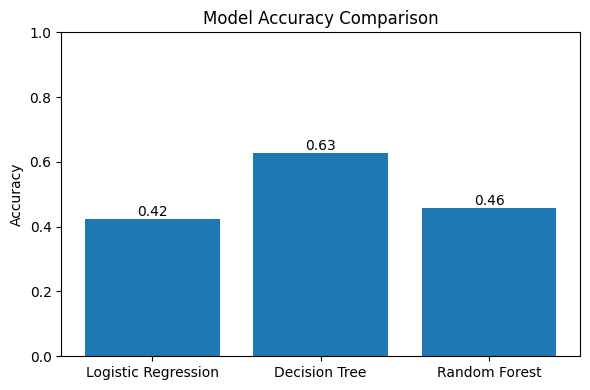

In [21]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [lr_accuracy, dt_accuracy, rf_accuracy]

plt.figure(figsize=(6,4))
bars = plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0,1)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             f"{bar.get_height():.2f}",
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


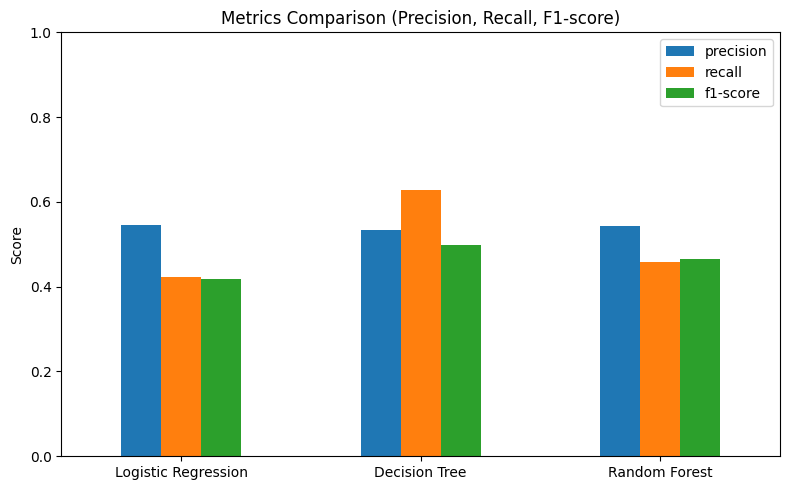

In [22]:

metrics = {
    'Logistic Regression': classification_report(
        y_test, y_pred_lr, output_dict=True, zero_division=0
    )['weighted avg'],

    'Decision Tree': classification_report(
        y_test, y_pred_dt, output_dict=True, zero_division=0
    )['weighted avg'],

    'Random Forest': classification_report(
        y_test, y_pred_rf, output_dict=True, zero_division=0
    )['weighted avg']
}

metrics_df = pd.DataFrame(metrics).T[['precision', 'recall', 'f1-score']]

metrics_df.plot(kind='bar', figsize=(8,5))
plt.title('Metrics Comparison (Precision, Recall, F1-score)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.tight_layout()
plt.show()


In [23]:
def predict_company_response():
    print("Enter details to predict company response:\n")

    # Take user input
    submitted_via = input("Submitted via (Web, Referral, Phone, Postal mail, Fax, Web Referral): ")
    state = input("State (e.g., NY, CA, TX): ")
    product = input("Product (e.g., Debt collection, Mortgage): ")
    sub_product = input("Sub-product (e.g., Credit reporting, Loan): ")
    issue = input("Issue (e.g., Incorrect information on your report): ")
    timely_response = input("Timely response? (Yes / No): ")

    # Create input DataFrame
    input_df = pd.DataFrame([{
        'Submitted via': submitted_via,
        'State': state,
        'Product': product,
        'Sub-product': sub_product,
        'Issue': issue,
        'Timely response?': timely_response
    }])

    # Encode 'Timely response?' using same encoder as training
    input_df['Timely response?'] = label_encoder.transform(input_df['Timely response?'])

    # One-hot encode input
    input_encoded = pd.get_dummies(input_df)

    # Align with training features
    input_encoded = input_encoded.reindex(columns=X_encoded.columns, fill_value=0)

    # Scale input
    input_scaled = scaler.transform(input_encoded)

    # Predict using Random Forest
    prediction = rf_model.predict(input_scaled)

    # Decode prediction
    predicted_label = target_encoder.inverse_transform(prediction)[0]

    print("\nPredicted Company Response:")
    print(predicted_label)


In [24]:
predict_company_response()

Enter details to predict company response:



Submitted via (Web, Referral, Phone, Postal mail, Fax, Web Referral):  Phone
State (e.g., NY, CA, TX):  NY
Product (e.g., Debt collection, Mortgage):  Mortgage
Sub-product (e.g., Credit reporting, Loan):  Loan
Issue (e.g., Incorrect information on your report):  Incorrect information on your report
Timely response? (Yes / No):  Yes



Predicted Company Response:
Closed with explanation
